In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
GENRES = ['Action', 'Animation', 'Comedy',
       'Crime','Drama','Horror', 'Sport', 'Thriller', 'War',
       'Western']

In [20]:
movies_df = pd.read_csv("dane/film/IMDb_movies.csv",
                       usecols=['imdb_title_id', 'title', 'year', 'genre', 'duration'])

movies_df = movies_df.dropna()
movies_df = movies_df[movies_df['year'] != "TV Movie 2019"]

movies_df['genre_list'] = movies_df['genre'].apply(lambda s: [el.strip() for el in s.split(",")] )
movies_df = movies_df.explode('genre_list')

movies_df = movies_df[movies_df['genre_list'].isin(GENRES)]
movies_df


C:\Users\lemur\AppData\Local\Temp\ipykernel_9656\1154348522.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("dane/film/IMDb_movies.csv",


,imdb_title_id,title,year,genre,duration,genre_list
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Crime
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Drama
2,tt0001892,Den sorte drøm,1911,Drama,53,Drama
3,tt0002101,Cleopatra,1912,"Drama, History",100,Drama
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Drama
...,...,...,...,...,...,...
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Comedy
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Drama
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,Drama
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",98,Drama


In [21]:
# ile filmów danego gatunku powstawało w kolejnych latach?

movies_df.value_counts(['genre_list', 'year']).reset_index()

,genre_list,year,count
0,Drama,2017,1752
1,Drama,2018,1669
2,Drama,2016,1623
3,Drama,2015,1511
4,Drama,2011,1351
...,...,...,...
1275,Action,1927,1
1276,Action,1923,1
1277,Action,1920,1
1278,Action,1918,1


In [22]:
# inny sposób
plot_df = movies_df.groupby(['genre_list', 'year'], as_index=False).size()
plot_df = plot_df.drop_duplicates()


plot_df

,genre_list,year,size
0,Action,1914,2
1,Action,1915,1
2,Action,1916,8
3,Action,1918,1
4,Action,1919,2
...,...,...,...
1275,Western,2016,12
1276,Western,2017,23
1277,Western,2018,15
1278,Western,2019,11


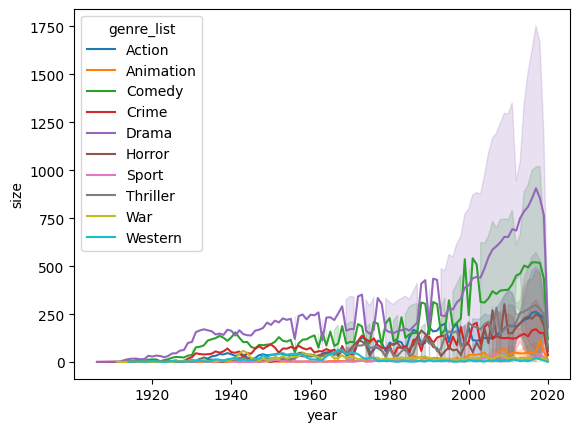

In [23]:
fig = plt.figure()
sns.lineplot(data=plot_df, x='year', y='size', hue='genre_list')
plt.show()

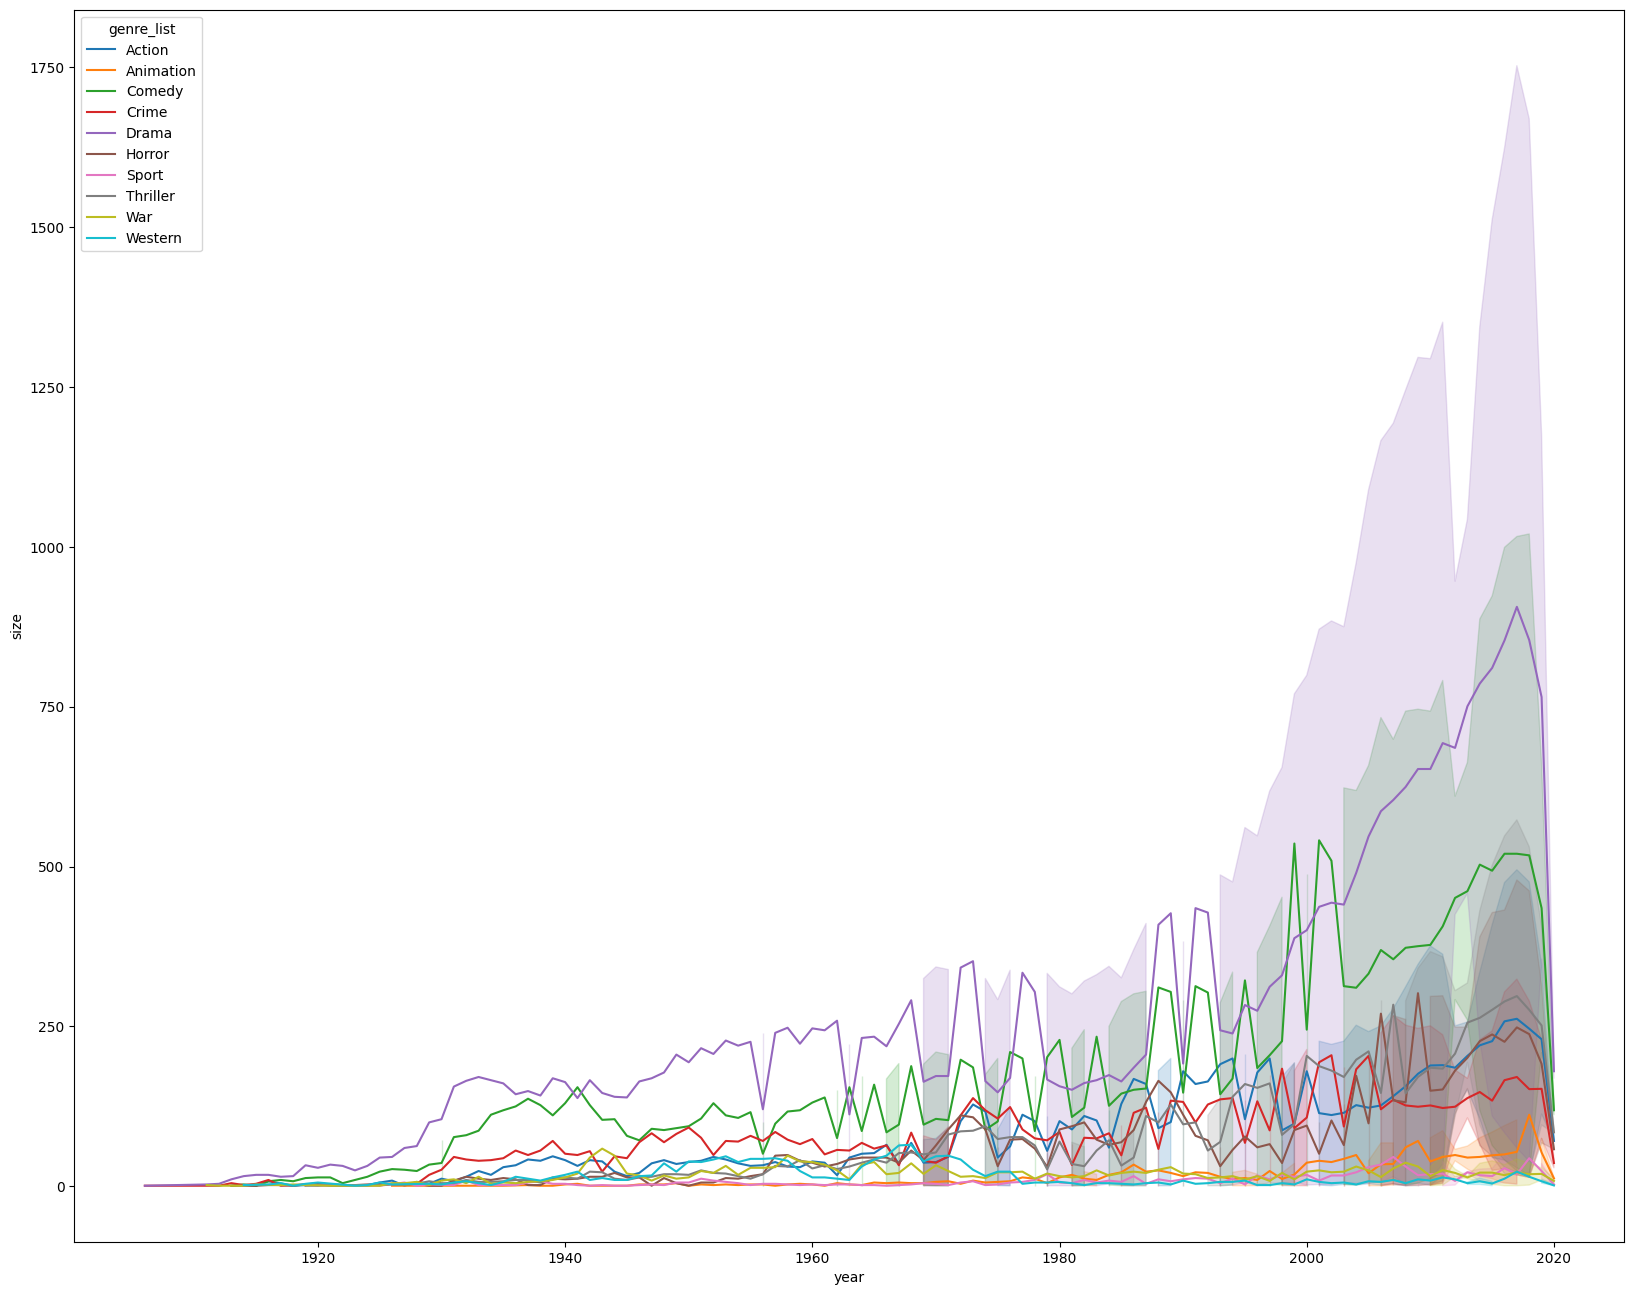

In [25]:
fig = plt.figure(figsize=(20, 16))
sns.lineplot(data=plot_df, x='year', y='size', hue='genre_list')
plt.show()

In [14]:
plot_df[plot_df['year'] == 2000]

,genre_list,year,size
85,Action,2000,180
230,Adventure,2000,86
339,Animation,2000,37
464,Biography,2000,40
582,Comedy,2000,489
734,Crime,2000,214
874,Drama,2000,799
1023,Family,2000,67
1151,Fantasy,2000,64
1307,History,2000,27


In [18]:
plot_df['genre_list'].unique()

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

TypeError: 'NoneType' object is not iterable

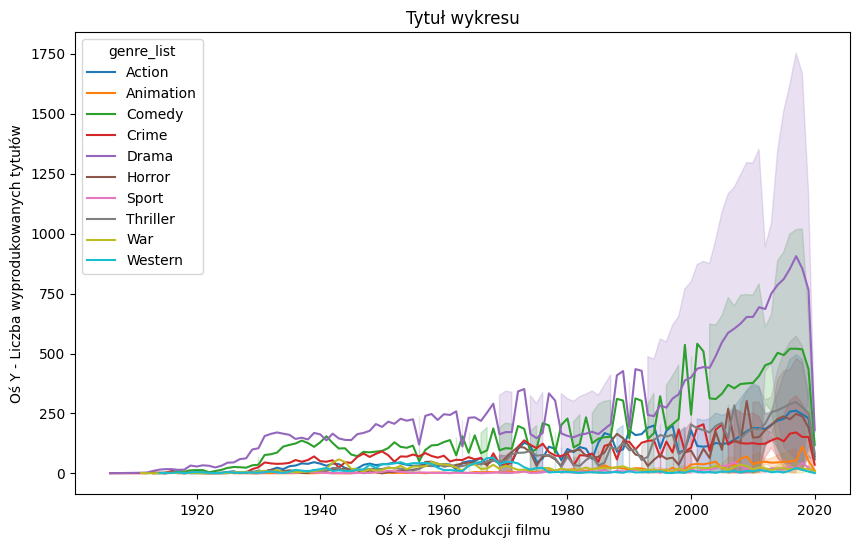

In [27]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df, x='year', y='size', hue='genre_list')
plt.title("Tytuł wykresu")
plt.xlabel("Oś X - rok produkcji filmu")
plt.ylabel("Oś Y - Liczba wyprodukowanych tytułów")
plt.show()

In [29]:
# które gatunki mają najdłuższe filmy?

plot_df = movies_df.groupby('genre_list', as_index=False).aggregate({"duration":"mean"})
plot_df

,genre_list,duration
0,Action,106.323679
1,Animation,87.396077
2,Comedy,98.223414
3,Crime,100.208838
4,Drama,103.766759
5,Horror,91.147850
6,Sport,103.758459
7,Thriller,99.753776
8,War,106.447368
9,Western,91.817435


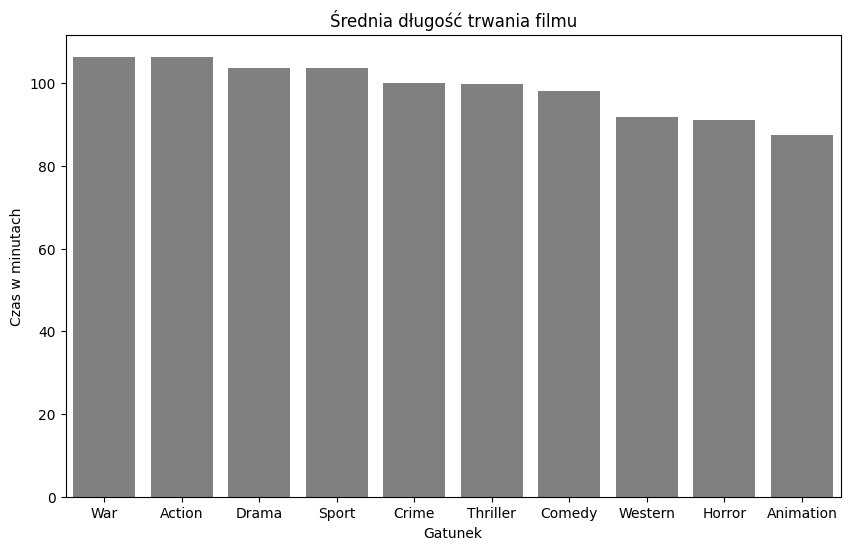

In [39]:
fig = plt.figure(figsize=(10, 6))

sns.barplot(data=plot_df.sort_values("duration", ascending=False),
            x='genre_list',
            y='duration',
            color='gray')

plt.title("Średnia długość trwania filmu")
plt.xlabel("Gatunek")
plt.ylabel("Czas w minutach")
plt.show()

In [41]:
movies_df['year'] = movies_df['year'].astype(int)

In [44]:
movies_df['year'].unique()

array([1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918, 1920,
       1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983, 1929,
       1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939, 1942,
       1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949, 1950,
       1952, 1951, 1962, 1953, 1954, 1955, 1956, 1958, 1957, 1959, 1961,
       1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976, 1970,
       1981, 1978, 1979, 2000, 1989, 1972, 1975, 1974, 1986, 1990, 2018,
       1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991, 2002,
       1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007, 2008,
       2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014, 2019,
       2020])

In [45]:
movies_df.groupby('year', as_index=False).aggregate({"duration":"mean"})

,year,duration
0,1906,70.000000
1,1911,76.200000
2,1912,70.833333
3,1913,85.888889
4,1914,78.555556
...,...,...
106,2016,102.106647
107,2017,102.520406
108,2018,103.721792
109,2019,105.831690


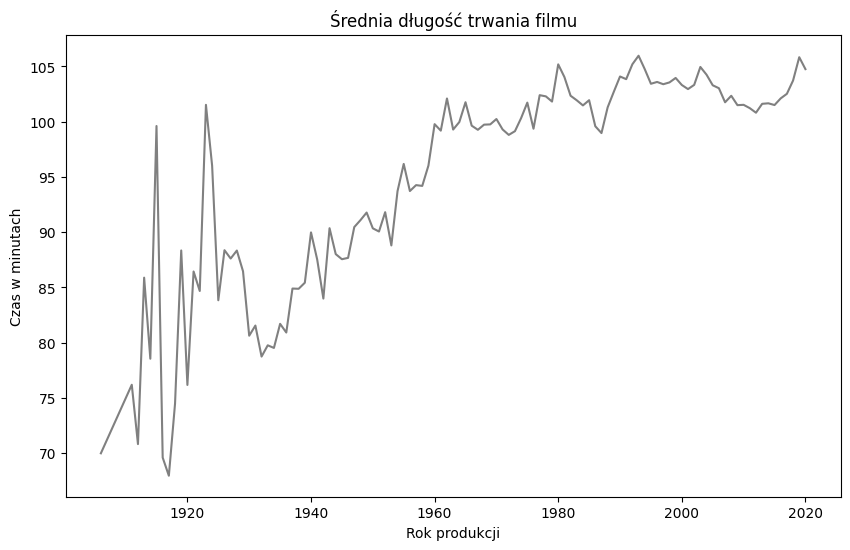

In [50]:
fig = plt.figure(figsize=(10, 6))

sns.lineplot(data=movies_df.groupby('year', as_index=False).aggregate({"duration":"mean"}),
            x='year',
            y='duration',
            color='gray')

plt.title("Średnia długość trwania filmu")
plt.xlabel("Rok produkcji")
plt.ylabel("Czas w minutach")
plt.savefig("wykres.png")
plt.show()


<Axes: xlabel='year', ylabel='duration'>

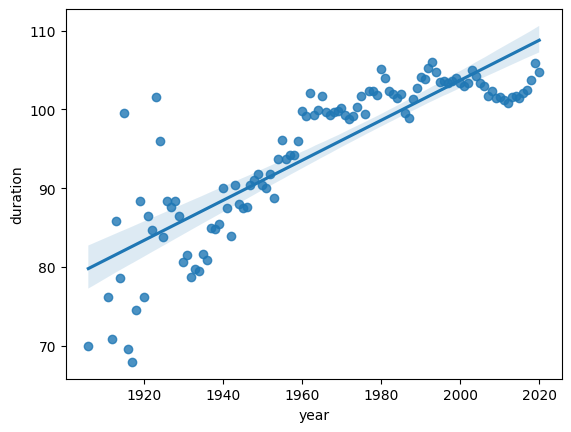

In [48]:
sns.regplot(data=movies_df.groupby('year', as_index=False).aggregate({"duration":"mean"}),
            x='year',
            y='duration')
